Datos de https://www.kaggle.com/gulsahdemiryurek/harry-potter-dataset#Harry Potter 3.csv

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/datatrooper/instatrooper/master/styles/whitetrooper.mplstyle')
dp = [
    "#1C1C3C",
    "#967B4F",
    "#46493D",
    "#839DA5",
    "#9FADAD",
    "#2B4144",
    "#986E37"
]

In [92]:
df1 = pd.read_csv("../../../data/hp/Harry Potter 1.csv", sep=";")
df1["Sentence"] = df1["Sentence"].str.lower()
df1["Character"] = df1["Character"].str.strip().str.lower()


In [93]:
df2 = pd.read_csv("../../../data/hp/Harry Potter 2.csv", sep=";")
df2["Sentence"] = df2["Sentence"].str.lower()
df2["Character"] = df2["Character"].str.strip().str.lower()


In [94]:
df3 = pd.read_csv("../../../data/hp/Harry Potter 3.csv", sep=";").rename(columns={"CHARACTER":"Character",
                                                                                  "SENTENCE": "Sentence"})
df3["Sentence"] = df3["Sentence"].str.lower()
df3["Character"] = df3["Character"].str.strip().str.lower()


In [95]:
df_total = pd.concat([df1,df2,df3], ignore_index=True)

In [117]:
word = "hate"
df_word = df_total[df_total["Sentence"].str.contains(word)]
df_word_count = df_word.groupby("Character").count().rename(columns={"Sentence":"cuenta"}).reset_index()
df_word_count = df_word_count.sort_values("cuenta", ascending=False).head(10).reset_index(drop="True")
df_word_count

,Character,cuenta
0,harry,2
1,hermione,2
2,mr. weasley,1
3,ron,1


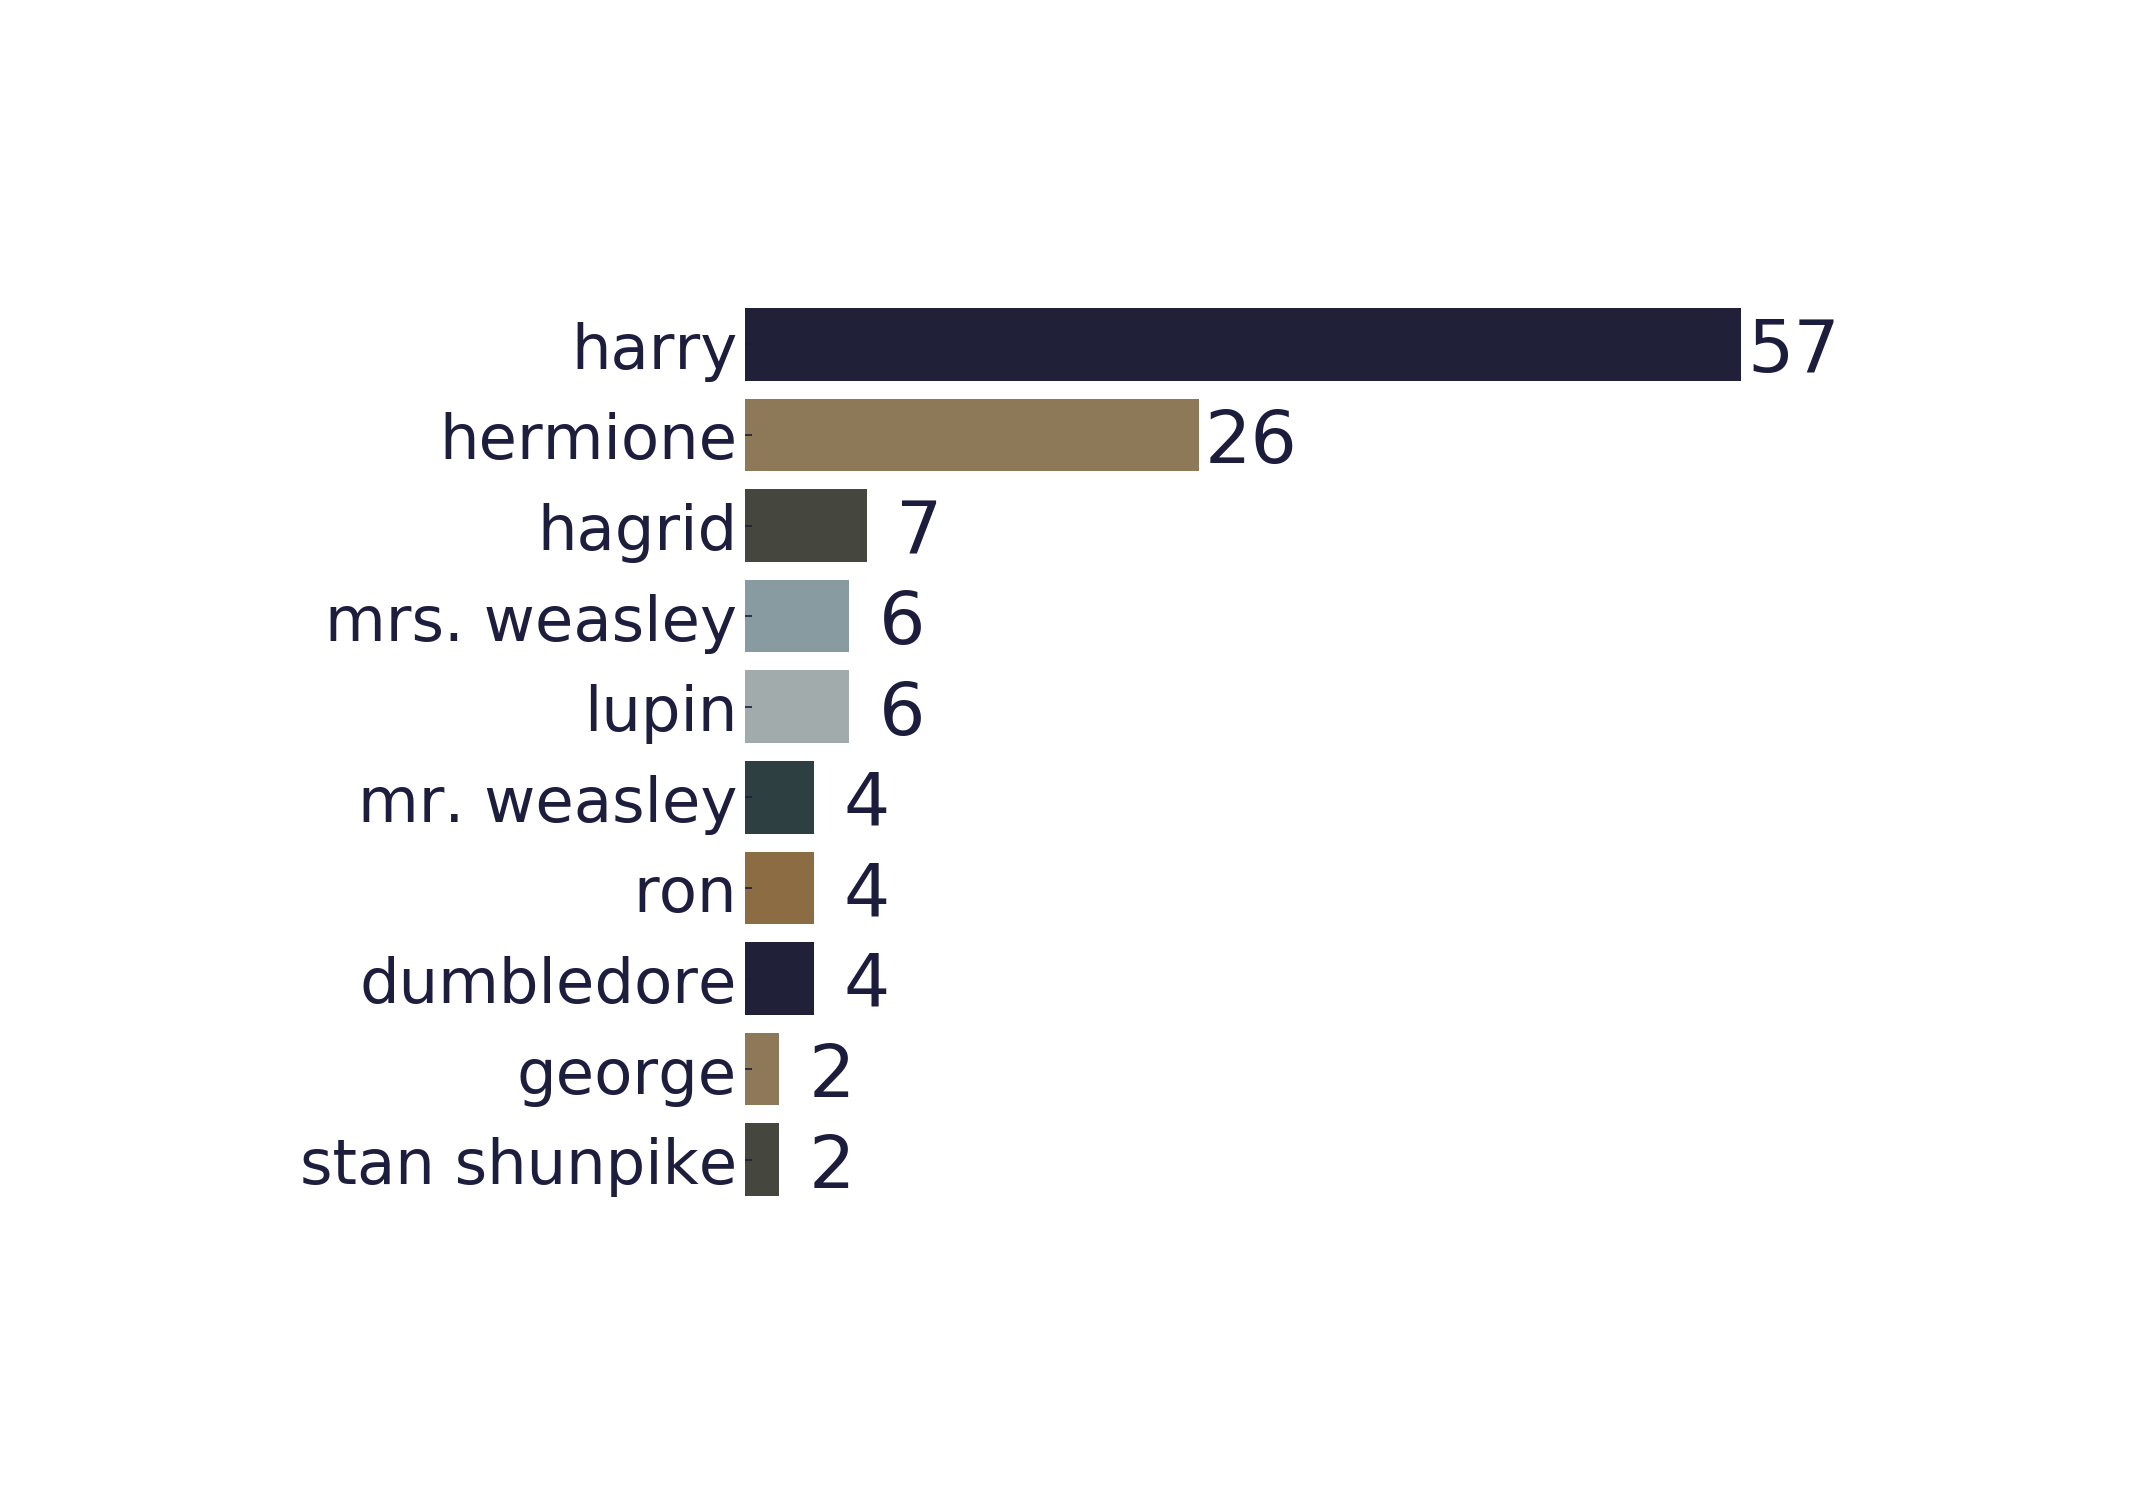

In [110]:
fig = plt.figure(figsize=(9,8))
ax = sns.barplot(x = "cuenta", y="Character", data=df_word_count, orient="h", palette=dp)
plt.grid(False)
plt.title("")
ax.set_xlabel("", fontsize=30)
ax.set_ylabel("", fontsize=30)

plt.xticks([])
plt.box(False)


# jugar con estos valores
vertical_offset = 0.3
horizontal_offset = 3

for index, row in df_word_count.iterrows():
    ax.text(row["cuenta"] + horizontal_offset,index+vertical_offset, # posicion
            row["cuenta"], # texto
            color='#1C1C3C', 
            ha="center", 
            size=35)

ax.tick_params(axis='both', which='major', labelsize=30)
plt.savefig('Harry.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()